# Dimensionality reduction and visualizations of Doc2Vec embeddings

In [1]:
import pickle
import pandas as pd
import numpy as np

In [3]:
DATA_PATH = './data/cleaned/'
DF_NAME = 'concatenated_df_cleaned_glove_and_d2v_slim.pkl'
with open(DATA_PATH + DF_NAME, 'rb') as f:
    df = pickle.load(f)

In [4]:
df.head()

,created_at,user,id_str,retweeted_status,Hash words,link,entities,Topic Label,urls,no_link,...,cluster,is_retweet,hashtags,link_shorteners,article_text,article_text_cleaned,glove_avg,article_text_cleaned_slim,d2v_slim_on_full_text,d2v_slim_on_slim_text
0,2020-01-31 23:08:33+00:00,"{'id': 19031057, 'id_str': '19031057', 'name':...",1223382589689356288,NaN,#coronavirus,https://twitter.com/user/status/12233825896893...,"{'hashtags': [{'text': 'coronavirus', 'indices...","(43, 0.999852366207409)",[https://www.kron4.com/news/national/when-will...,False,...,43,False,[coronavirus],[False],"KRON4 by: Aubree Gordon, University of Michig...","[kron, aubree, gordon, university, michigan, c...","[0.14527764461177867, 1.301592749657575, 0.487...","[gordon, university, michigan, started, wuhan,...","[-0.6245752, 0.14277315, -0.037865084, -1.3431...","[-0.5959578, -0.04095654, -0.0583945, -1.36681..."
1,2020-01-31 23:11:29+00:00,"{'id': 798925214, 'id_str': '798925214', 'name...",1223383328843280384,{'created_at': 'Fri Jan 31 20:41:20 +0000 2020...,#coronavirus #vaccine:,https://twitter.com/user/status/12233833288432...,"{'hashtags': [{'text': 'Coronavirus', 'indices...","(6, 0.9883827140131066)",[https://www.cnbc.com/2020/01/31/coronavirus-w...,False,...,6,True,"[Coronavirus, vaccine]",[False],U.S. and international health officials are s...,"[international, health, officials, speeding, w...","[0.4456857605208643, 1.4679776202002541, 0.697...","[international, officials, speeding, work, cre...","[3.1439579, 0.029145319, -1.4272867, -0.557075...","[3.4041867, 0.015371752, -1.507652, -0.4591941..."
2,2020-01-31 23:12:03+00:00,"{'id': 806144538049970176, 'id_str': '80614453...",1223383471999127552,NaN,No hashtags,https://twitter.com/user/status/12233834719991...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(74, 0.9999928079220538)",[https://www.businessinsider.com/australia-suc...,False,...,74,False,[None],[False],A leading-edge research firm focused on digit...,"[leading_edge, research, firm_focused, active,...","[-0.012559317511040717, 0.5841067982127425, 0....","[leading_edge, firm_focused, active, since, sc...","[-0.17761439, -1.7141314, -0.060127772, -0.127...","[-0.16660655, -1.7138119, -0.100325935, 0.0856..."
3,2020-01-31 23:35:42+00:00,"{'id': 61298849, 'id_str': '61298849', 'name':...",1223389423045206016,{'created_at': 'Tue Jan 28 18:26:16 +0000 2020...,No hashtags,https://twitter.com/user/status/12233894230452...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(36, 0.9999993854913211)",[https://www.greenmedinfo.com/blog/examining-r...,False,...,36,True,[None],[False],Mr. Kennedy is in very safe territory by rep...,"[mr, kennedy, safe, territory, reporting, cdc,...","[1.2950098205753602, 3.404326125156658, 2.0269...","[mr, kennedy, safe, territory, reporting, cdc,...","[2.8572357, -1.3235706, -0.99055654, -1.5378, ...","[2.852278, -1.1592753, -0.9633579, -1.5380106,..."
4,2020-01-31 23:37:23+00:00,"{'id': 1152822375567654912, 'id_str': '1152822...",1223389844719599616,NaN,No hashtags,https://twitter.com/user/status/12233898447195...,"{'hashtags': [], 'symbols': [], 'user_mentions...","(74, 0.9999985797901156)",[https://www.dailymail.co.uk/news/article-7952...,False,...,74,False,[None],[True],By Kylie Stevens and Stephen Gibbs and Nic Wh...,"[kylie, stevens, stephen, gibbs, nic, white, d...","[0.23033713073586115, 4.3884405878634425, 4.87...","[stephen, white, daily, mail, australia, publi...","[1.1250601, 2.213006, 0.28957278, 2.3071132, -...","[1.0463305, 2.149375, 0.16751175, 2.3347838, -..."


In [5]:
df.week_month_year.unique()
# use these as labels

array([ 5,  7,  9, 14, 15, 18, 20, 22])

In [11]:
# make d2v vectors into dataframe to use PCA
dims = []
for i in range(100):
    dims.append('dim_' + str(i))
    
# d2v new model
# d2v_vecs = df['d2v_slim_on_full_text'].tolist()
d2v_vecs = df['d2v_slim_on_slim_text'].tolist()

features_df = pd.DataFrame([vec for vec in d2v_vecs], columns=dims)

# pca feature creation
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
principalComponents = pca.fit_transform(features_df)
pca_features = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2'])

In [12]:
# apply labels by time of year
label = df['week_month_year'].tolist()
pca_df = pd.concat([pca_features, df[['week_month_year']]], axis=1)
pca_df.head()

,principal component 1,principal component 2,week_month_year
0,-1.351806,1.267213,5
1,5.929537,-2.156190,5
2,-0.553549,-0.883197,5
3,-1.407409,7.312505,5
4,-3.367338,-5.865576,5


### PCA clumps all the documents together

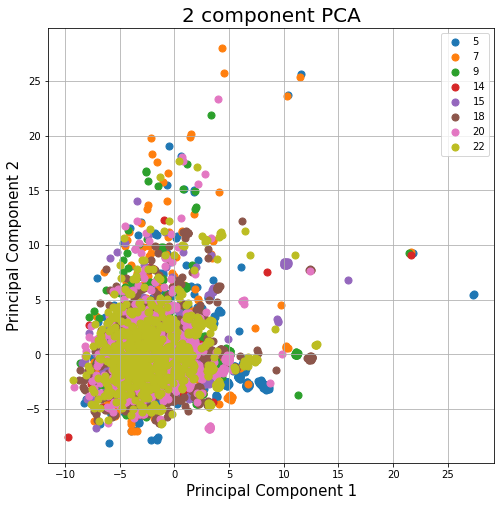

In [13]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(1,1,1) 
ax.set_xlabel('Principal Component 1', fontsize = 15)
ax.set_ylabel('Principal Component 2', fontsize = 15)
ax.set_title('2 component PCA', fontsize = 20)


targets = pca_df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
for target, color in zip(targets,colors):
    indicesToKeep = pca_df['week_month_year'] == target
    ax.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], 
               pca_df.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    
# plt.xlim(-100, 500)
# plt.ylim(-100, 100)
    
ax.legend(targets)
ax.grid()

### plotting one by one

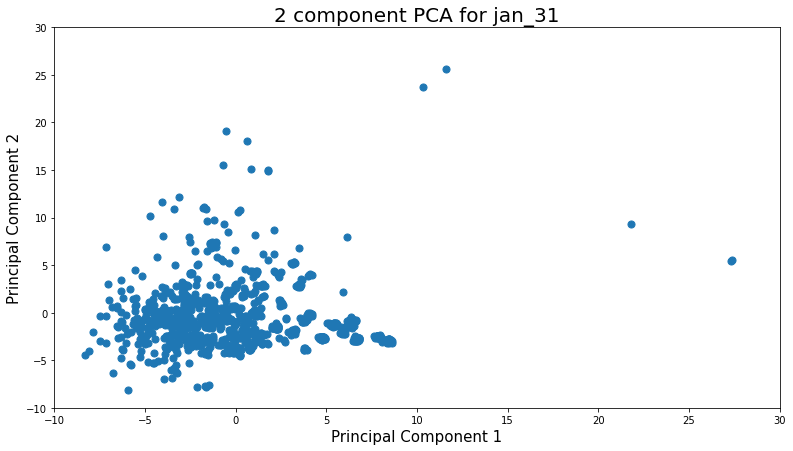

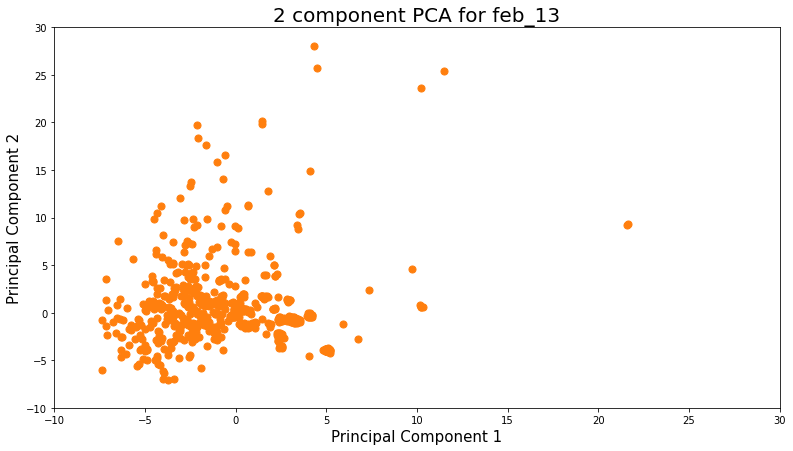

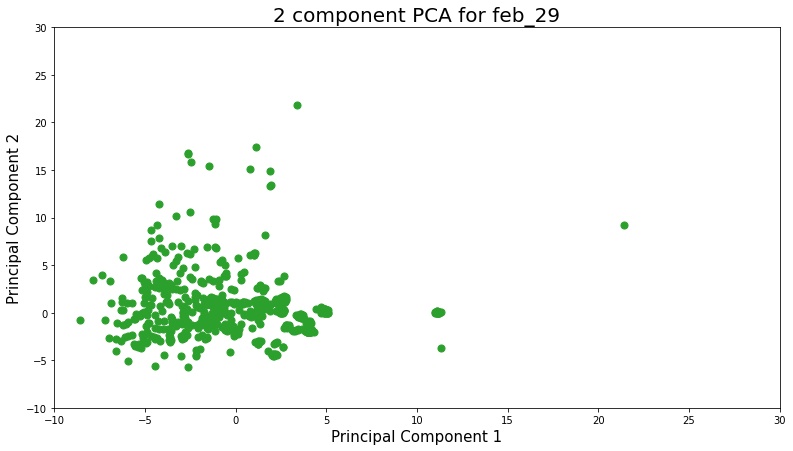

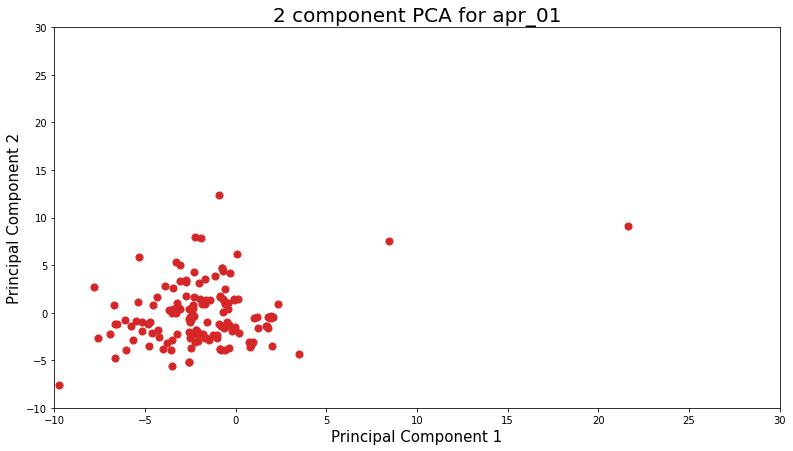

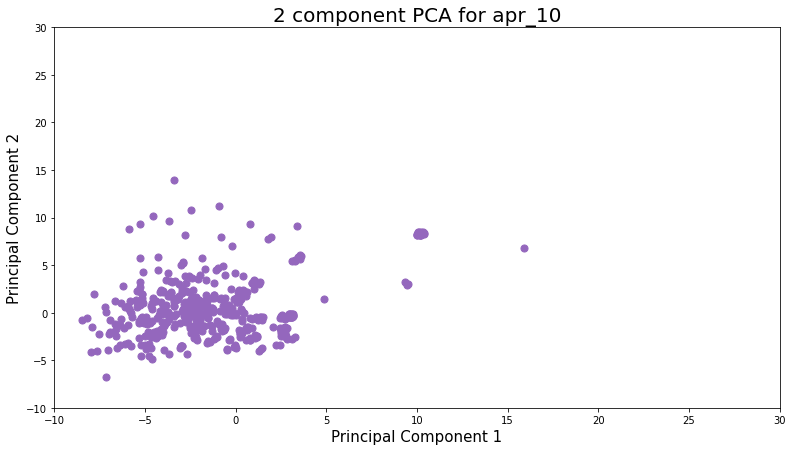

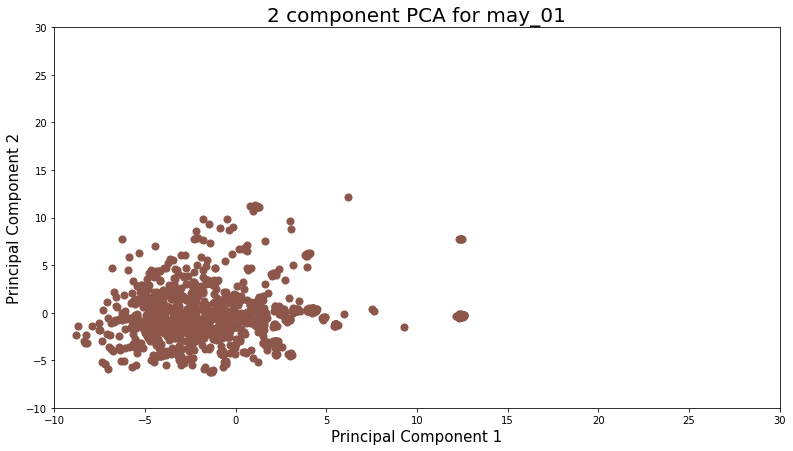

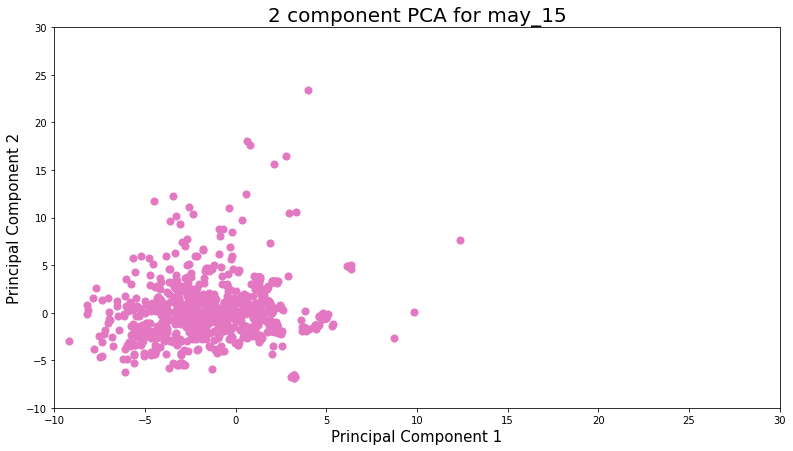

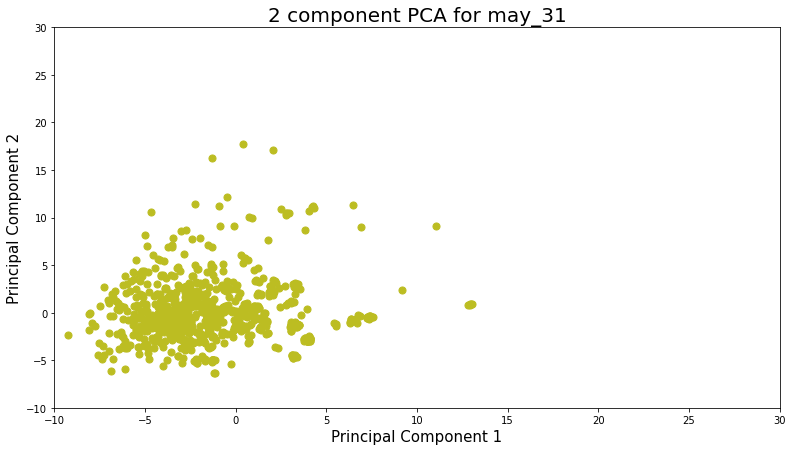

In [14]:
targets = pca_df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
dates = ['jan_31', 'feb_13', 'feb_29', 'apr_01', 'apr_10', 'may_01', 'may_15', 'may_31']
for target, color, date in zip(targets, colors, dates):
    indicesToKeep = pca_df['week_month_year'] == target
    plt.figure(figsize=(13,7))
    plt.scatter(pca_df.loc[indicesToKeep, 'principal component 1'], 
               pca_df.loc[indicesToKeep, 'principal component 2'], 
               c = color, 
               s = 50)
    
    plt.xlabel('Principal Component 1', fontsize = 15)
    plt.ylabel('Principal Component 2', fontsize = 15)
    plt.title('2 component PCA for ' + date, fontsize = 20)
        
    plt.xlim(-10, 30)
    plt.ylim(-10, 30)
    
#     plt.figure(figsize=(13,7))
    plt.show()
    


## t-sne

[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 7454 samples in 0.057s...
[t-SNE] Computed neighbors for 7454 samples in 11.922s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7454
[t-SNE] Computed conditional probabilities for sample 2000 / 7454
[t-SNE] Computed conditional probabilities for sample 3000 / 7454
[t-SNE] Computed conditional probabilities for sample 4000 / 7454
[t-SNE] Computed conditional probabilities for sample 5000 / 7454
[t-SNE] Computed conditional probabilities for sample 6000 / 7454
[t-SNE] Computed conditional probabilities for sample 7000 / 7454
[t-SNE] Computed conditional probabilities for sample 7454 / 7454
[t-SNE] Mean sigma: 0.793555
[t-SNE] KL divergence after 250 iterations with early exaggeration: 81.384979
[t-SNE] KL divergence after 300 iterations: 2.363374
t-SNE done! Time elapsed: 42.766533851623535 seconds


<AxesSubplot:xlabel='tsne_2d_one', ylabel='tsne_2d_two'>

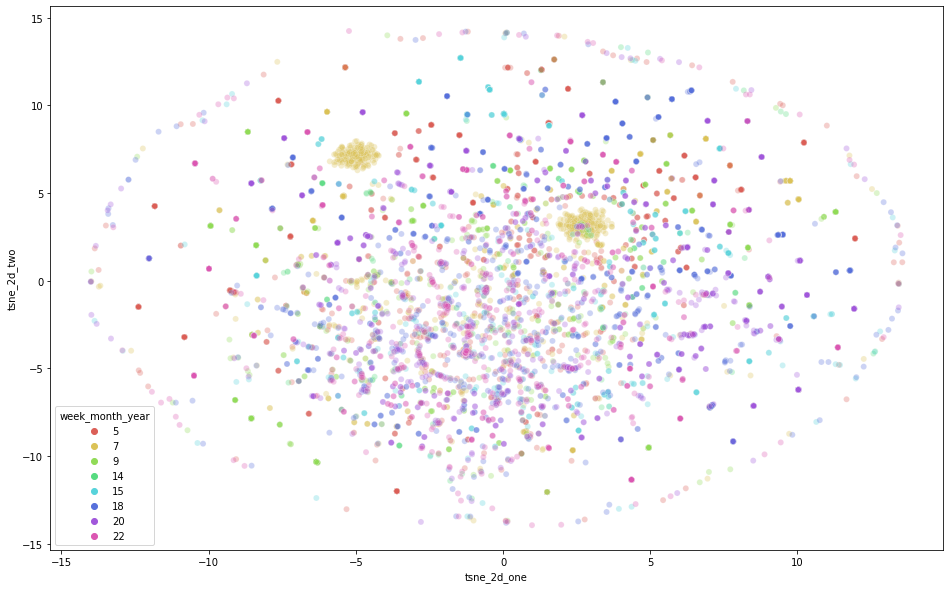

In [15]:
from sklearn.manifold import TSNE
import time
time_start = time.time()
tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


# plt.scatter(tsne_results[:,0], tsne_results[:,1])
# plt.figure(figsize=(16,10))
# plt.show()

df['tsne_2d_one'] = tsne_results[:,0]
df['tsne_2d_two'] = tsne_results[:,1]
import seaborn as sns
plt.figure(figsize=(16,10))
sns.scatterplot(
    x="tsne_2d_one", y="tsne_2d_two",
    hue="week_month_year",
    palette=sns.color_palette("hls", 8),
    data=df,
    legend="full",
    alpha=0.3
)

#### 3-d tsne

In [ ]:
time_start = time.time()
tsne = TSNE(n_components=3, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(features_df)
print('t-SNE done! Time elapsed: {} seconds'.format(time.time()-time_start))


df['tsne_3d_one'] = tsne_results[:,0]
df['tsne_3d_two'] = tsne_results[:,1]
df['tsne_3d_three'] = tsne_results[:,2]


In [ ]:
tsne_results.shape

In [ ]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')


x = df['tsne_3d_one']
y = df['tsne_3d_two']
z = df['tsne_3d_three']



targets = df['week_month_year'].unique().tolist()
colors = ['tab:blue', 'tab:orange', 'tab:green', 'tab:red', 'tab:purple', 'tab:brown', 'tab:pink', 'tab:olive', 'tab:cyan'] # 'tab:olive', 
for target, color in zip(targets,colors):
    indicesToKeep = df['week_month_year'] == target
    ax.scatter(df.loc[indicesToKeep, 'tsne_3d_one'], 
               df.loc[indicesToKeep, 'tsne_3d_two'],
               df.loc[indicesToKeep, 'tsne_3d_three'],
               c = color, 
               s = 50)

# ax.scatter(x, y, z, c='', marker='o')


ax.set_xlabel('tsne-1')
ax.set_ylabel('tsne-2')
ax.set_zlabel('tsne-3')

plt.show()



